<a href="https://colab.research.google.com/github/omdotpin/project/blob/main/linkedinjobanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/linkedin-jobs-usa.csv')

# View first few rows
df.head()


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing crucial info
df.dropna(subset=['title', 'company', 'description', 'location'], inplace=True)

# Lowercase the text columns
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()


In [9]:
import re

# Define skills to search for
skills = ['sql', 'excel', 'python', 'r', 'tableau', 'power bi', 'aws', 'azure',
          'machine learning', 'statistics', 'data visualization', 'big data']

# Function to extract skills from text
def extract_skills(desc):
    return [skill for skill in skills if re.search(rf'\b{skill}\b', desc)]

# Apply the function
df['skills_found'] = df['description'].apply(extract_skills)


In [10]:
from collections import Counter

# Combine all extracted skills
all_skills = [skill for sublist in df['skills_found'] for skill in sublist]
skill_counts = Counter(all_skills)

# Convert to DataFrame
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
skill_df.head()


,Skill,Count
0,sql,2002
1,python,1089
2,tableau,1030
3,statistics,896
4,r,785


In [11]:
top_locations = df['location'].value_counts().head(10)


<ipython-input-12-3327560600>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')


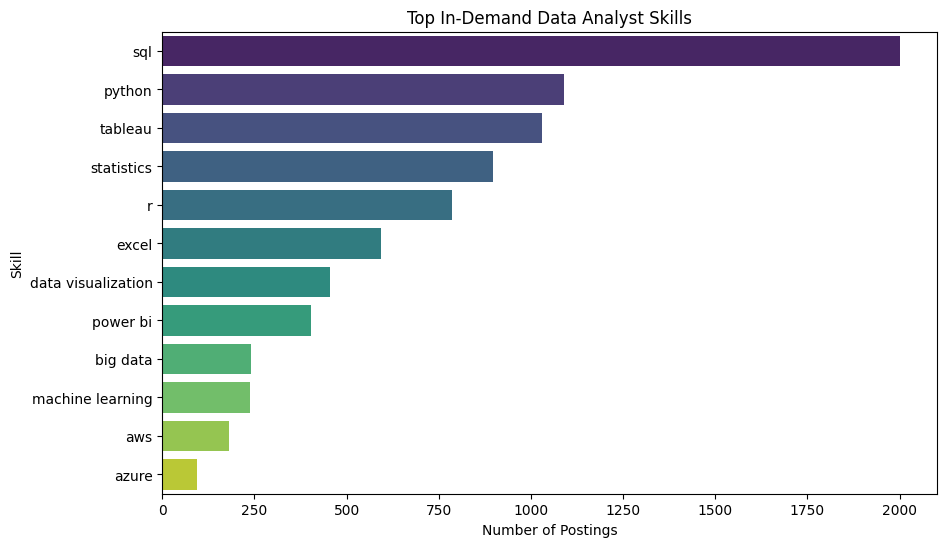

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Top In-Demand Data Analyst Skills')
plt.xlabel('Number of Postings')
plt.ylabel('Skill')
plt.show()


<ipython-input-13-1490496519>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')


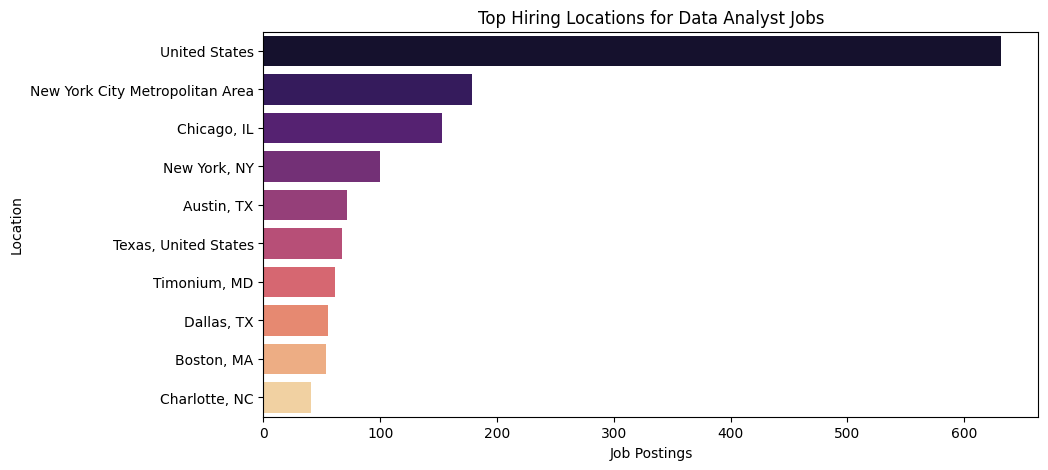

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title('Top Hiring Locations for Data Analyst Jobs')
plt.xlabel('Job Postings')
plt.ylabel('Location')
plt.show()


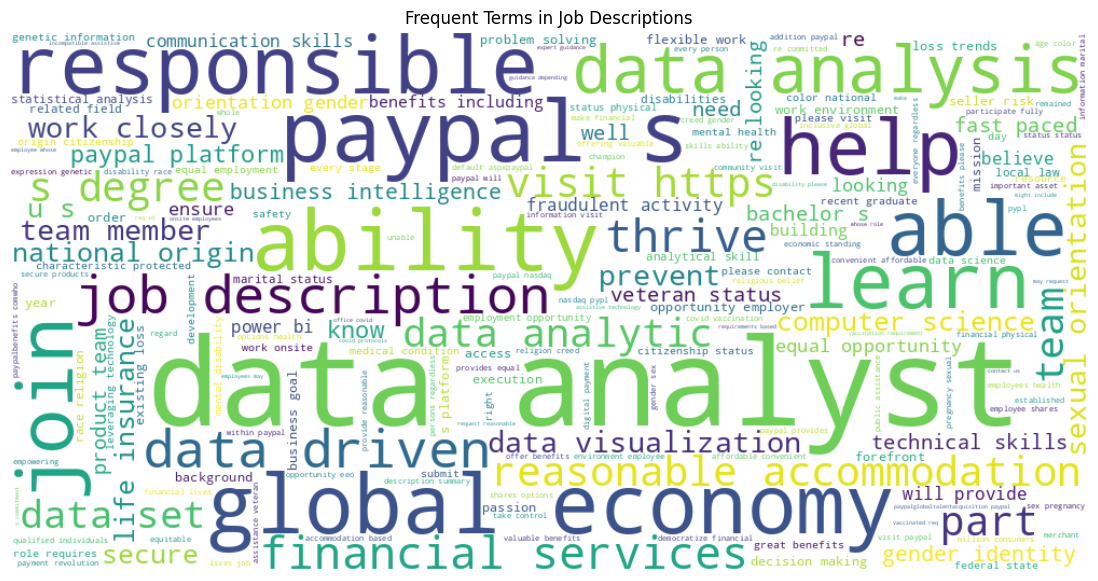

In [14]:
from wordcloud import WordCloud

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Terms in Job Descriptions')
plt.show()


In [17]:
import ast

# Convert the 'criteria' column from string to list of dictionaries
df['criteria_dicts'] = df['criteria'].dropna().apply(ast.literal_eval)

In [18]:
# Define functions to extract fields from the dictionary list
def get_criterion(criteria_list, key):
    for item in criteria_list:
        if key in item:
            return item[key]
    return None

# Apply functions to extract relevant fields
df['seniority'] = df['criteria_dicts'].apply(lambda x: get_criterion(x, 'Seniority level'))
df['employment_type'] = df['criteria_dicts'].apply(lambda x: get_criterion(x, 'Employment type'))
df['job_function'] = df['criteria_dicts'].apply(lambda x: get_criterion(x, 'Job function'))
df['industry'] = df['criteria_dicts'].apply(lambda x: get_criterion(x, 'Industries'))


<ipython-input-19-1797526859>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seniority_counts.values, y=seniority_counts.index, palette='cubehelix')


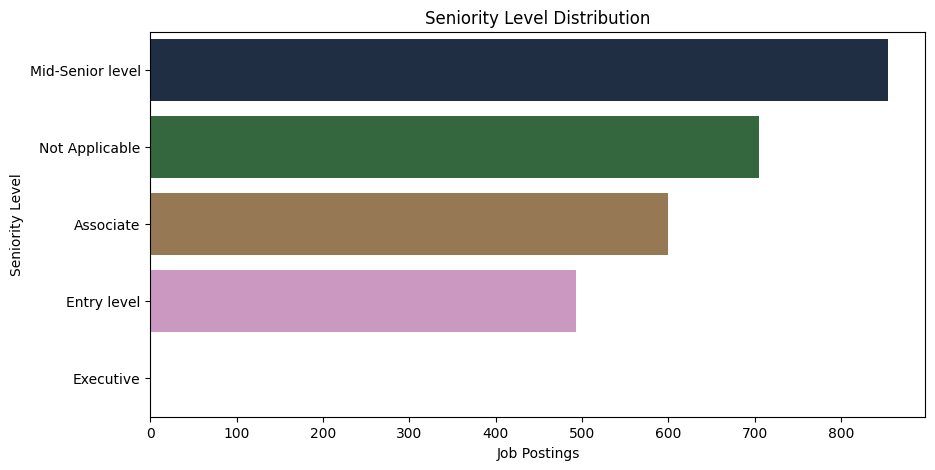

In [19]:
# Count seniority level
seniority_counts = df['seniority'].value_counts()

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=seniority_counts.values, y=seniority_counts.index, palette='cubehelix')
plt.title('Seniority Level Distribution')
plt.xlabel('Job Postings')
plt.ylabel('Seniority Level')
plt.show()


<ipython-input-20-564641828>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_counts.values, y=employment_counts.index, palette='pastel')


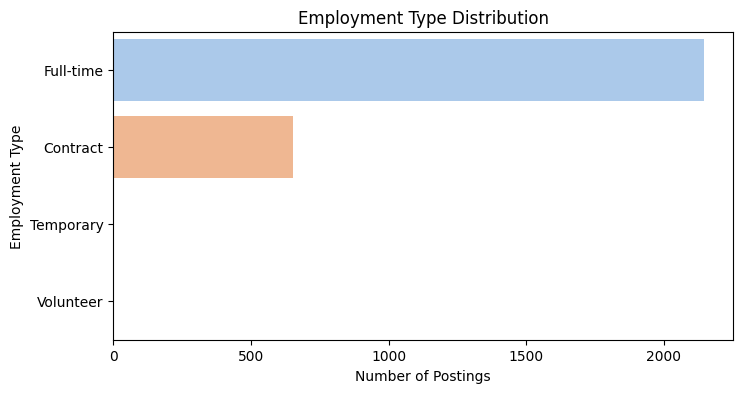

In [20]:
employment_counts = df['employment_type'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=employment_counts.values, y=employment_counts.index, palette='pastel')
plt.title('Employment Type Distribution')
plt.xlabel('Number of Postings')
plt.ylabel('Employment Type')
plt.show()


<ipython-input-21-3356792280>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_func_counts.values, y=job_func_counts.index, palette='coolwarm')


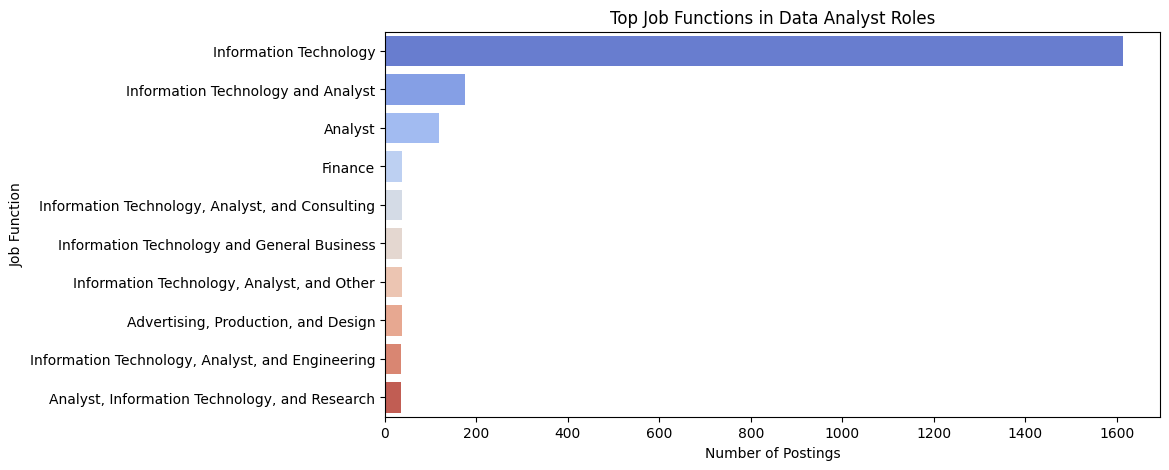

In [21]:
job_func_counts = df['job_function'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=job_func_counts.values, y=job_func_counts.index, palette='coolwarm')
plt.title('Top Job Functions in Data Analyst Roles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Function')
plt.show()
